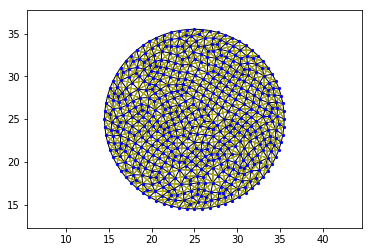

In [2]:
from link import link
from vertice import vertice
from cell import cell
from newcoords import newcoords
from createnetwork import createnetwork
from INP_Circle_returnverticesandpolygons import INP_Circle_returnverticesandpolygons
from get_neighbors_links import get_neighbors_links

import networkx as nx
from matplotlib import pyplot as plt

T = 20.
time_steps = 10.
dt = T / time_steps
gamma = 0.01

mesh_basename = "Circle_quad"

[points, polygons] = INP_Circle_returnverticesandpolygons(
	mesh_filename = mesh_basename+".inp")

[vertices, links, cells] = createnetwork(points, polygons)

G = nx.Graph()
membrane = []
inside = []

for i in range(len(vertices)) :
	G.add_node(i, pos = (vertices[i].coords[0], vertices[i].coords[1]))
for i in range(len(links)) :
	if links[i].place == "membrane" :
		G.add_edge(links[i].vertices[0].n, links[i].vertices[1].n)
		membrane.append((links[i].vertices[0].n,links[i].vertices[1].n))
	if links[i].place == "inside" :
		G.add_edge(links[i].vertices[0].n, links[i].vertices[1].n)
		inside.append((links[i].vertices[0].n,links[i].vertices[1].n))
pos = nx.get_node_attributes(G, 'pos')

nx.draw_networkx_nodes(G, pos,
	node_color = 'b',
	node_size = 5)
nx.draw_networkx_edges(G, pos,
	edgeslist = membrane,
	edge_color = 'black')
nx.draw_networkx_edges(G, pos,
	edgelist = inside,
	edge_color='y')
plt.axis('equal')
plt.show()

Regarder comment modifier la couleur des arêtes en fonction de leur différence de longueur par rapport à la longueur initiale :
https://networkx.github.io/documentation/networkx-1.9/examples/drawing/knuth_miles.html